In [53]:
import pandas as pd
import numpy as np
import os
from elo_system.model import Model
from elo_system.skill import TournamentSkill
from elo_system.skill import TournamentSkill
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [54]:
model_paths = [
    os.path.join("elo_system/compare", f)
    for f in os.listdir("elo_system/compare")
    if f != ".gitignore"
]
models = [Model(p) for p in model_paths]
names_to_models = {m.name: m for m in models}

In [55]:
ts = TournamentSkill()
for m in models:
    ts.add_player(m.name)

In [56]:
matches = pd.read_csv("matches.csv", index_col=0)
for _, m1, m2, *goals in matches.itertuples():
    ts.match(m1, m2, goals)

In [57]:
df = ts.getModelsDF(matches).reset_index()
df["model_type"] = df["name"].map(lambda x: x.split("_")[0])
df["train_steps"] = df["name"].map(lambda x: names_to_models[x].steps)
df["policy_shape"] = df["name"].map(lambda x: names_to_models[x].shape)
df["param_count"] = df["name"].map(lambda x: names_to_models[x].param_count)
df.to_csv("leaderboard.csv",index=False)
df

,name,mean,var,elo,win,draw,loss,rank,rank_prob,wr,model_type,train_steps,policy_shape,param_count
0,child_654m,46.514945,3.969401,3243.675551,265,444,56,1,0.058955,0.636601,child,654915498,"[2048, 2048, 1024, 1024]",7549973
1,curriculum_405m,44.747335,3.467675,3480.826498,268,403,84,2,0.057858,0.621854,curriculum,405360906,"[1024, 1024, 1024, 512, 512, 512]",3252245
2,gentle_105m,43.569686,3.685559,3264.346116,198,375,73,3,0.056954,0.596749,gentle,105951590,"[1024, 1024, 1024, 512, 512, 512]",3252245
3,grounded_60m,43.530374,3.762586,3213.854035,270,400,98,4,0.056912,0.611979,grounded,60027320,"[1024, 1024, 1024, 512, 512, 512]",3252245
4,grounded_100m,43.408165,3.708097,3241.263687,230,408,110,5,0.056827,0.580214,grounded,100045716,"[1024, 1024, 1024, 512, 512, 512]",3252245
5,bulldog_470m,36.750493,3.642832,2917.687852,198,325,77,6,0.050764,0.600833,bulldog,470632948,"[1024, 1024, 512, 512]",1939989
6,curriculum_306m,34.582695,3.487074,2883.479451,144,533,83,7,0.048352,0.540132,curriculum,306046938,"[1024, 1024, 1024, 512, 512, 512]",3252245
7,gentle_63m,32.767507,3.568303,2736.587648,100,391,69,8,0.046052,0.527679,gentle,63331002,"[1024, 1024, 1024, 512, 512, 512]",3252245
8,gentle_260m,30.653547,3.827754,2501.646803,91,343,51,9,0.043007,0.541237,gentle,260993302,"[1024, 1024, 1024, 512, 512, 512]",3252245
9,curriculum_204m,28.841334,3.451710,2571.133251,37,594,69,10,0.040285,0.477143,curriculum,204032096,"[1024, 1024, 1024, 512, 512, 512]",3252245


In [58]:
matches

,Model1,Model2,Orange,Tie,Blue
time,,,,,
1.741852e+09,grounded_60m,default_deep_136m,3.0,2.0,0.0
1.741852e+09,curriculum_61m,gentle_bigcrit_104m,1.0,3.0,1.0
1.741852e+09,grounded_60m,default_deep_136m,5.0,0.0,0.0
1.741852e+09,curriculum_61m,gentle_bigcrit_104m,0.0,5.0,0.0
1.741844e+09,curriculum_102m,curriculum_405m,0.0,0.0,5.0
...,...,...,...,...,...
1.741860e+09,gentle_bigcrit_38m,curriculum_tiny_30m,0.0,15.0,0.0
1.741860e+09,curriculum_tiny_100m,grounded_60m,1.0,12.0,2.0
1.741860e+09,gentle_105m,curriculum_wide_114m,6.0,8.0,1.0


In [80]:
ranks=df.loc[df["param_count"]<=2_000_000, 'name'].to_list()
ranks

['bulldog_470m',
 'gentle_bigcrit_66m',
 'curriculum_tiny_100m',
 'gentle_tiny_100m',
 'gentle_bigcrit_104m',
 'sparse_60m',
 'gentle_tiny_30m',
 'gentle_tiny_60m',
 'curriculum_tiny_60m',
 'gentle_bigcrit_38m',
 'pure_ppo_780m',
 'curriculum_tiny_30m']

In [86]:
# ranks = df.name.to_list()
wins = np.zeros((len(ranks),len(ranks)))
count = np.zeros((len(ranks),len(ranks)))
for _,n1, n2, w, d, l in matches.itertuples():
    if n1 not in ranks or n2 not in ranks: continue
    wins[ranks.index(n1),ranks.index(n2)] += w + (d/2)
    wins[ranks.index(n2),ranks.index(n1)] += l + (d/2)
    count[ranks.index(n1),ranks.index(n2)] += w+d+l
    count[ranks.index(n2),ranks.index(n1)] += w+d+l
heatmap = wins/count
# heatmap = count
heatmap = heatmap[::-1]

C:\Users\Anshuman\AppData\Local\Temp\ipykernel_18492\3230767398.py:10: RuntimeWarning: invalid value encountered in divide
  heatmap = wins/count


<Axes: >

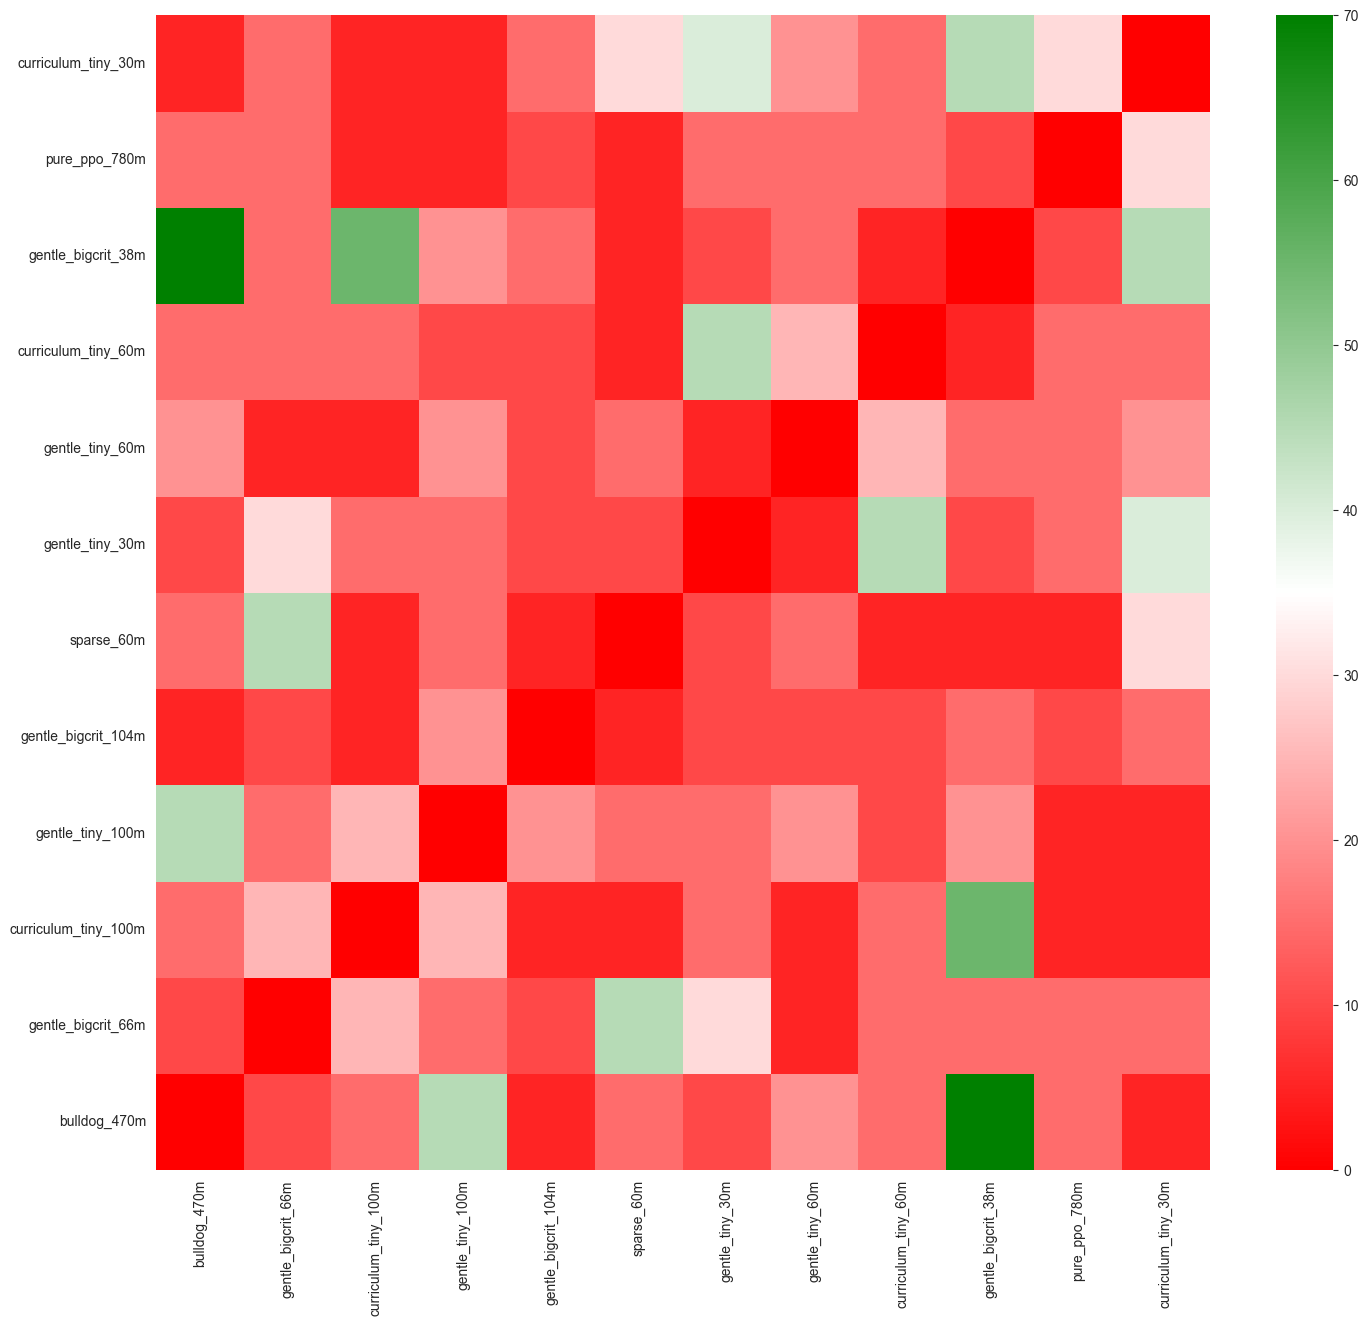

In [85]:
hmdf = pd.DataFrame(heatmap, index=ranks[::-1], columns=ranks)
plt.figure(figsize=(17,15))
sns.heatmap(hmdf, cmap = colors.LinearSegmentedColormap.from_list(
    "RedGreen", ["red", "white", "green"]
), annot=False, fmt=".2f")

In [62]:
ranks

['child_654m',
 'curriculum_405m',
 'gentle_105m',
 'grounded_60m',
 'grounded_100m',
 'bulldog_470m',
 'curriculum_306m',
 'gentle_63m',
 'gentle_260m',
 'curriculum_204m',
 'grounded_30m',
 'gentle_bigcrit_66m',
 'curriculum_102m',
 'curriculum_tiny_100m',
 'curriculum_wide_114m',
 'gentle_tiny_100m',
 'curriculum_30m',
 'curriculum_wide_60m',
 'curriculum_slow_100m',
 'deeper_gentle_128m',
 'curriculum_61m',
 'gentle_bigcrit_104m',
 'sparse_60m',
 'gentle_tiny_30m',
 'gentle_tiny_60m',
 'curriculum_tiny_60m',
 'default_deep_136m',
 'gentle_33m',
 'curriculum_wide_30m',
 'gentle_bigcrit_38m',
 'pure_ppo_780m',
 'curriculum_tiny_30m']

In [63]:
need_to_run = []
for i in range(len(ranks)):
    for j in range(i+1,len(ranks)):
        # print(ranks[i],ranks[j])
        if np.isnan(hmdf.loc[ranks[i],ranks[j]]):
            # print(ranks[i],ranks[j] ,hmdf.loc[ranks[i],ranks[j]])
            need_to_run.append((ranks[i],ranks[j]))
need_to_run

[]

<Axes: xlabel='train_steps', ylabel='elo'>

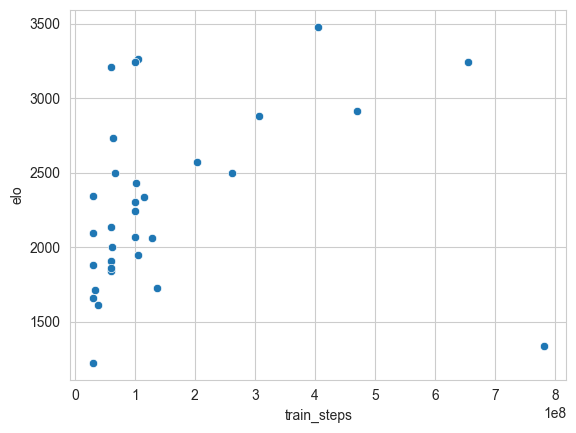

In [64]:
sns.scatterplot(df, x="train_steps", y="elo")

<Axes: xlabel='param_count', ylabel='train_steps'>

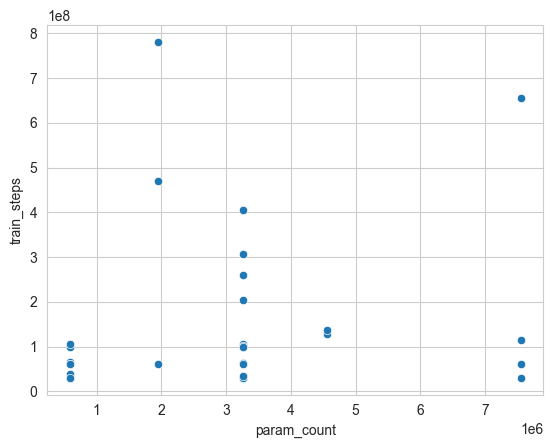

In [65]:
sns.scatterplot(df, x="param_count", y="train_steps")

<Axes: xlabel='param_count', ylabel='elo'>

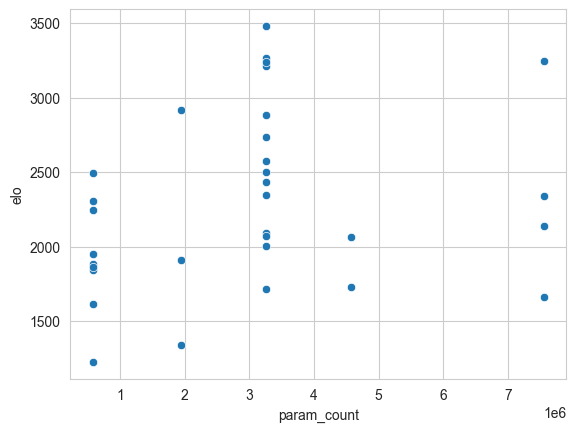

In [66]:
sns.scatterplot(df, x="param_count", y="elo")